In [9]:
#Importing the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models.Copulae import normalCopulaSimulation

sns.set()

In [10]:
#Generate sample data to fit the copula on
data = np.random.normal(size=(250,20))

#Instantiate a copula object
copula = normalCopulaSimulation(dispstr="un")

In [11]:
#Inspecting the raw object
copula.__dict__

{'copula': <rpy2.robjects.functions.DocumentedSTFunction object at 0x7f7633f1fd50> [3]
 R classes: ('function',),
 '_copula_kwargs': {'dispstr': 'un'},
 '_fit_kwargs': {},
 '_fitted': False}

In [12]:
#Fitting data on the copula object
copula.fit(data,method="irho")

In [13]:
#Inspecting the fitted copula object
copula.__dict__

{'copula': <rpy2.robjects.functions.DocumentedSTFunction object at 0x7f7633f1fd50> [3]
 R classes: ('function',),
 '_copula_kwargs': {'dispstr': 'un'},
 '_fit_kwargs': {'method': 'irho'},
 '_fitted': True,
 'dim': 20,
 '_data': array([[ 1.62892189, -0.50523809,  2.01030037, ...,  1.05051765,
          0.6486126 , -0.67734117],
        [-0.69397994,  0.39888825, -0.1477075 , ...,  0.56421795,
          0.59996021, -0.82348861],
        [ 1.79395686, -0.75574364,  1.86375947, ...,  1.26746859,
         -2.20742266, -0.99322905],
        ...,
        [-0.88774042,  1.21365864,  0.00735661, ...,  1.11577282,
         -0.48098654,  0.01426606],
        [-1.18748865, -0.37330335, -0.23180184, ..., -0.05033487,
          0.10303806,  0.12282632],
        [-2.13639723, -1.31308875,  0.13488036, ...,  0.90415465,
         -0.47831162, -0.57346213]]),
 '_params': <rpy2.robjects.vectors.FloatVector object at 0x7f7633e4c9d0> [14]
 R classes: ('numeric',)
 [0.036432, -0.122007, 0.060977, -0.072999,

In [14]:
#Inspecting the copula parameters
print(copula._params)

#The data type of the parameters is an R floatVector for seamless integration into R
print(type(copula._params))

#But can be seamlessly casted into e.g. numpy array
np.array(copula._params)

        rho.1         rho.2         rho.3         rho.4         rho.5 
 3.643220e-02 -1.220073e-01  6.097723e-02 -7.299898e-02  3.822941e-02 
        rho.6         rho.7         rho.8         rho.9        rho.10 
 2.247901e-02 -3.370252e-03 -5.275541e-03  1.578144e-02 -8.401608e-02 
       rho.11        rho.12        rho.13        rho.14        rho.15 
 6.608813e-02 -4.887689e-02 -3.588619e-02 -2.641075e-02  2.519642e-02 
       rho.16        rho.17        rho.18        rho.19        rho.20 
-1.330522e-01  3.533536e-02 -1.354726e-02  7.570505e-02 -9.322224e-02 
       rho.21        rho.22        rho.23        rho.24        rho.25 
 1.021437e-01  5.098500e-02 -3.259564e-02 -9.523708e-02  4.645192e-02 
       rho.26        rho.27        rho.28        rho.29        rho.30 
 7.720873e-02  2.688120e-02  7.283770e-03 -1.788853e-02  5.125916e-02 
       rho.31        rho.32        rho.33        rho.34        rho.35 
-7.317549e-03  1.065001e-01 -1.194320e-01 -1.119726e-02 -1.740036e-02 
      

array([ 3.64321958e-02, -1.22007337e-01,  6.09772273e-02, -7.29989815e-02,
        3.82294050e-02,  2.24790122e-02, -3.37025240e-03, -5.27554121e-03,
        1.57814396e-02, -8.40160781e-02,  6.60881341e-02, -4.88768856e-02,
       -3.58861922e-02, -2.64107479e-02,  2.51964155e-02, -1.33052230e-01,
        3.53353610e-02, -1.35472639e-02,  7.57050548e-02, -9.32222370e-02,
        1.02143688e-01,  5.09849995e-02, -3.25956406e-02, -9.52370825e-02,
        4.64519248e-02,  7.72087263e-02,  2.68811986e-02,  7.28376991e-03,
       -1.78885276e-02,  5.12591628e-02, -7.31754863e-03,  1.06500058e-01,
       -1.19431974e-01, -1.11972595e-02, -1.74003604e-02, -3.15550612e-02,
       -6.38060426e-02, -1.13200675e-01,  6.44000858e-02,  2.94698563e-02,
        1.07409981e-01,  9.47470372e-02, -6.03702901e-02, -1.50938173e-02,
        1.43490922e-02,  3.03206690e-02,  3.90383402e-02, -8.67737831e-02,
       -6.44941354e-02, -1.18173923e-01,  7.28631518e-02,  3.70988152e-02,
       -1.33896324e-02, -

2000

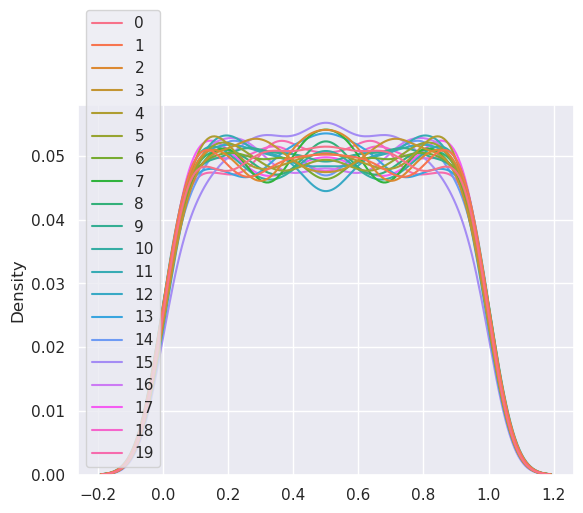

In [15]:
#Draw (predict) 1000 random uniform samples and add antithetic variates
pred_raw = copula.predict(n=1e3,anti=True)

sns.kdeplot(pred_raw)

len(pred_raw)

1000

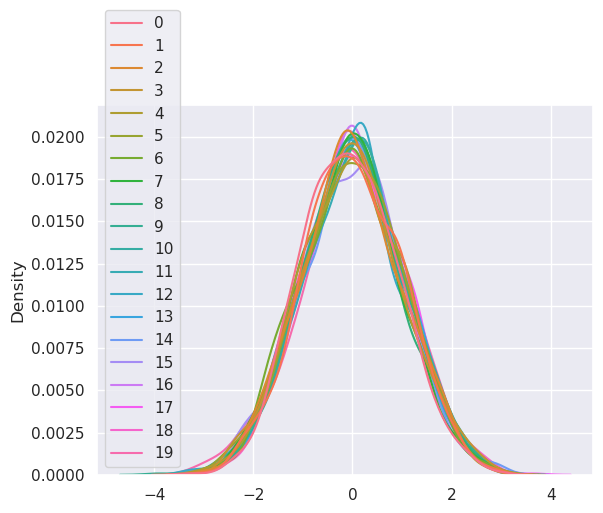

In [16]:
#Predict 1000 random samples with empirical margins without adding antithetic variates
pred_emp = copula.predict_empirical(n=1e3,anti=False)

sns.kdeplot(pred_emp)

len(pred_emp)

2000

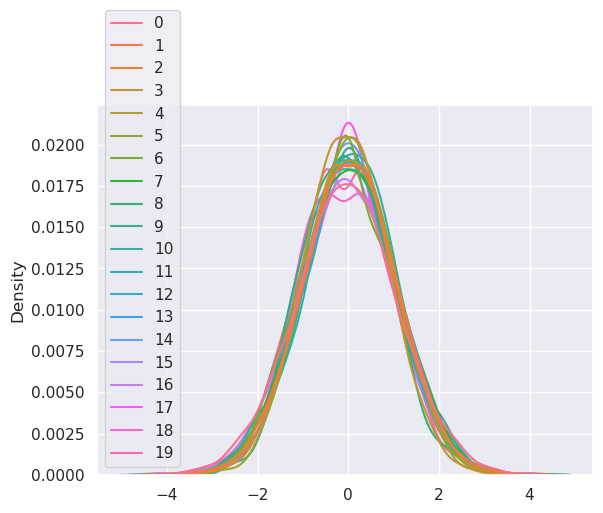

In [17]:
#Predict with parametric margin, e.g. normal margin
pred_norm = copula.predict_parametric(1e3,distribution="norm")

sns.kdeplot(pred_norm)

len(pred_norm)